## Data Collect

In [41]:
참고내용
CNN
'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (부록)\\(Misc.) 1. cvlib을 활용한 편리한 얼굴 & 물체 검출'
'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 4. TF2.0 Tensorboard & Keras for CNN MNIST (+ Colab GPU with GoogleDrive)'
    
DNN
'C:\\Users\\RYU\\MLDL_Likelion\\Part 6. 딥러닝 핵심 이론 & TF를 활용한 딥러닝 실습\\실습 파일 (메인)\\(Appendix) 3. CNN for Fashion MNIST & CIFAR10 (+Transfer learning)'

NameError: name '참고내용' is not defined

### Image Scrapping

In [1]:
import pandas as pd


from selenium import webdriver
from bs4 import BeautifulSoup
import requests

import time

#### Image URL address scrapping

In [2]:
url = "https://store.musinsa.com/app/goods/685185"
# headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}

In [4]:
from selenium.webdriver.chrome.options import Options
options = Options()
options.binary_location = "C:\Program Files\Google\Chrome\Application\chrome.exe" # 실제 크롬 브라우저 설치 경로를 찾아 적용
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe', chrome_options=options) # webdriver 실행 시마다 동일

In [5]:
driver.get(url)

In [6]:
img_url_lst = []

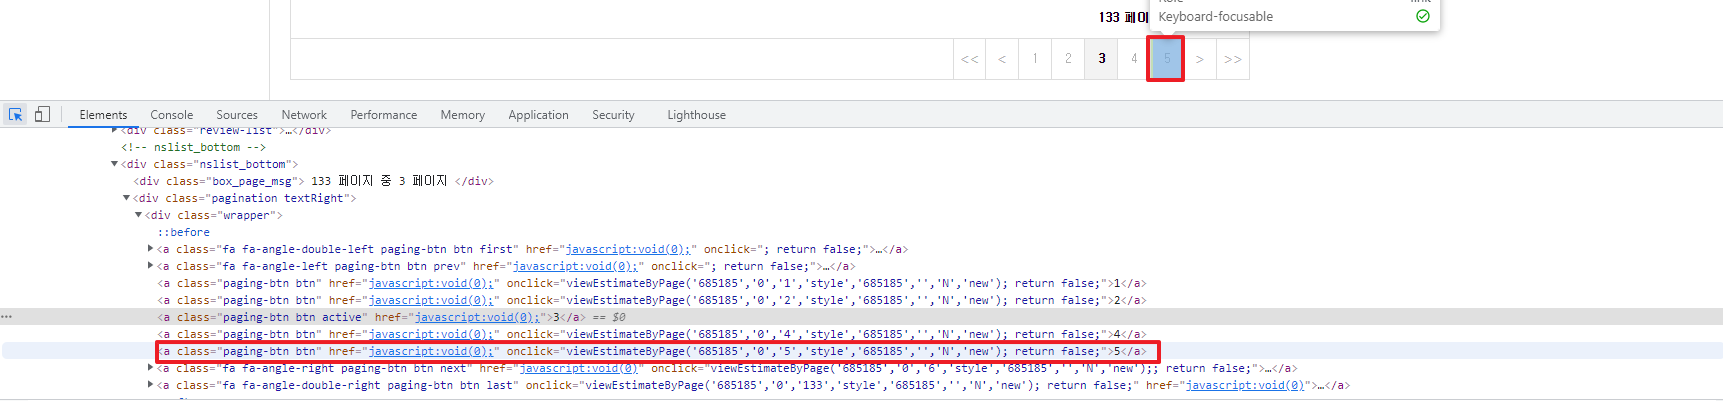

In [7]:
# 한 page당 10개의 review
# 1~100page 이동
# total 1000개의 Data확보

for i in range(1,101):
    # Page이동 - java script code실행
    driver.execute_script("viewEstimateByPage('685185','0',{},'style','685185','','N','new'); return false;".format(i))
    time.sleep(2) # selenium 특성상, loading속도를 못따라갈 수 있으므로 2초씩 sleep진행
    web = driver.page_source # selenium으로 열어둔 driver의 현재 page로 접근
    
    soup = BeautifulSoup(web, 'html.parser')
    scrapping_url_dir = soup.find_all('li', {"class":"review-content-photo__item"})

    for img_url in scrapping_url_dir:
        temp_ = img_url.find('img')['src']
        # https:가 생략된 url이 나오므로, 이를 추가하여 list-up
        img_url_lst.append("https:"+temp_)

        
# url이 바뀌지 않아서 선택한 방법
# # page이동 방법1 - java code 실행시키기
# driver.execute_script("viewEstimateByPage('685185','0','2','style','685185','','N','new'); return false;")
        
# # page이동 방법2 - css 코드에서 찾기
# driver.find_elements_by_css_selector('#wrapStyleEstimateList > div > div.nslist_bottom > div.pagination.textRight > div > a')[4].click()

KeyboardInterrupt: 

In [ ]:
driver.close()
driver.quit()

#### image save

In [45]:
import urllib.request
import glob

import pandas as pd
import os

In [46]:
# 중복제거
img_url_lst = list(set(img_url_lst))

In [47]:
# save as df
# df_img_url=pd.DataFrame(img_url_lst,columns=['url'])
# df_img_url.to_csv('685185.csv',encoding='utf-8')

In [48]:
# load url list
df_img_url = pd.read_csv('685185.csv',encoding='utf-8')
df_img_url = df_img_url.iloc[:,1:]
img_url_lst = df_img_url['url'].tolist()

In [49]:
# # images folder 생성
# os.mkdir(os.getcwd()+"\\images")

In [43]:
# img url list 에서 각각의 url로부터 image file 'images0000.jpg'를 저장
for index, url in enumerate(img_url_lst):

    urllib.request.urlretrieve(url, "images/images{0:04}.jpg".format(index))
    
    if index%100 == 0:
        print('Downloaded image # :', index)
    time.sleep(0.4)
    

print('Download completed!')

Downloaded image # : 0
Downloaded image # : 100
Downloaded image # : 200
Downloaded image # : 300
Downloaded image # : 400
Downloaded image # : 500
Downloaded image # : 600
Downloaded image # : 700
Downloaded image # : 800
Downloaded image # : 900
Downloaded image # : 1000
Downloaded image # : 1100
Download completed!


### Prepare Dataset

In [50]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [51]:
import cv2
import cvlib as cv

In [52]:
# resize 함수

def resize_imgs(path):
    img = cv2.imread(path)
    if max(img.shape)>256:
        
        #세로가 256 px 이상이고 세로로 긴 경우
        if img.shape[0] == max(img.shape):
            new_w = img.shape[1] * (256.0/img.shape[1])
            new_h = img.shape[0] * (256.0/img.shape[1])
        #가로가 256 px 이상이고 세로로 긴 경우
        elif img.shape[1] == max(img.shape):
            new_w = img.shape[1] * (256.0/img.shape[0])
            new_h = img.shape[0] * (256.0/img.shape[0])
    else:
            new_w=img.shape[1]
            new_h=img.shape[0]
            
    img = cv2.resize(img, (int(new_w), int(new_h)))
    return img

#### detect_fullbody (포기상태)
https://www.researchgate.net/figure/Some-exemplar-human-body-detection-results_fig1_325104310

In [53]:
# def cv_detect_fullbody(path): # path parameter를 통해 파일 경로를 받아들이게 됩니다.
#     img = cv2.imread(path,1)
# #     img = cv2.resize(img,(14,28))

#     if (type(img) is np.ndarray):
#         print(img.shape) # 세로, 가로, 채널

#         fullbody_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')

#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # detectMultiScale(Original img, ScaleFactor, minNeighbor) : further info. @ http://j.mp/2SxjtKR
#         fullbody = fullbody_cascade.detectMultiScale(gray, 1.05 , 3) 
#         for (x, y, w, h) in fullbody:
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#             roi_gray = gray[y:y+h, x:x+w]
#             roi_color = img[y:y+h, x:x+w]

#         cv2.imwrite(path, img)
#     else:
#         print('Error occurred within cv_detect_face!')
#         print(path)
        
        
#     return img

In [54]:
# plt.imshow(cv2.cvtColor(cccc, cv2.COLOR_BGR2RGB))
# plt.show()

https://answers.opencv.org/question/42049/body-detection-using-haarcascade/ <br>
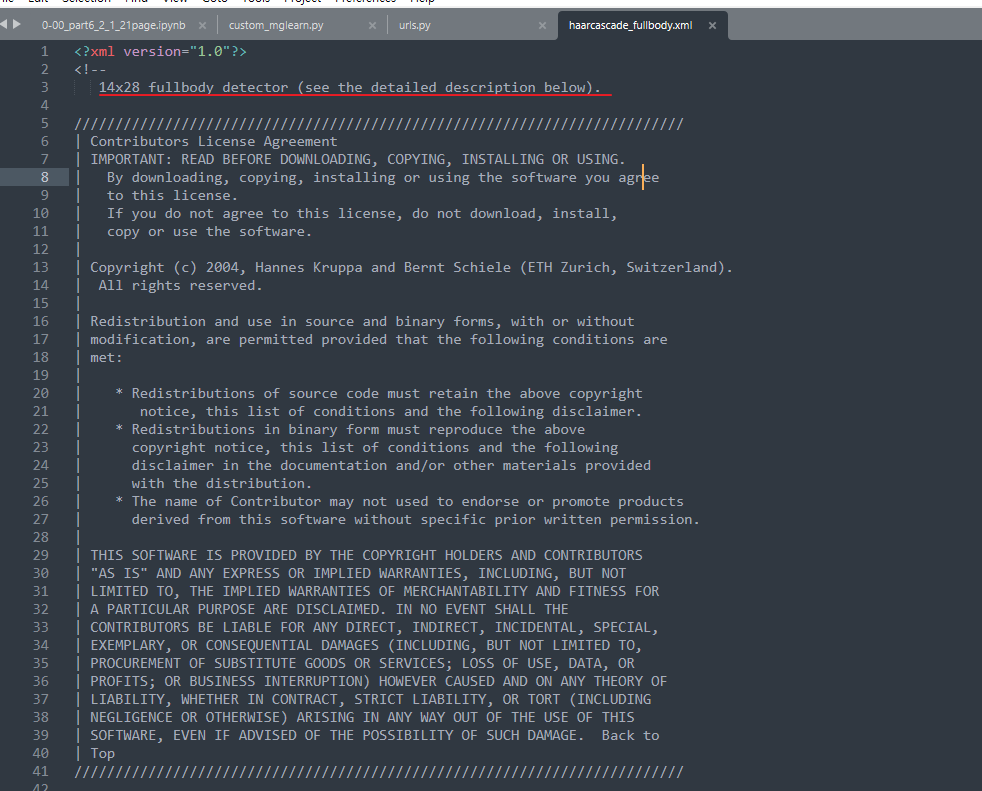<br>
detecting을 못함. -> 포기 ㅋ

detecting 없이 진행 <br>
https://east-rain.github.io/docs/Deep%20Learning/tensorflow%20tutorial/image_classification.html

## Deep Learning

**[ CNN 관련 참고자료 ]**

<br>

http://taewan.kim/post/cnn/ (한글 설명) 
<br>

https://poloclub.github.io/cnn-explainer/ (CNN 내부의 구체적인 계산 과정 시각화) 

<br>

https://yceffort.kr/2019/01/29/pytorch-3-convolutional-neural-network (필터 예시) 
<br>

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1 (필터 예시) 
<br>

https://goo.gl/zsSQ8z (필터 예시) 

<br>

https://blog.exxactcorp.com/lets-learn-the-difference-between-a-deep-learning-cnn-and-rnn/ (필터 적용 예시 on MNIST) 
<br>

https://medium.com/@phidaouss/convolutional-neural-networks-cnn-or-convnets-d7c688b0a207 (필터 적용 시각화)

<br>

https://www.slideshare.net/yongho/ss-79607172 (CNN 개념 이해) 
<br>

https://www.youtube.com/playlist?list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp (CNN 개념 이해)

In [55]:
from sklearn.model_selection import train_test_split

In [58]:
train_ok_dir = os.path.join('images/True')
train_no_dir = os.path.join('images/False')

In [59]:
print(len(os.listdir(train_ok_dir)))
print(len(os.listdir(train_no_dir)))
# Data Augmentation 필요할듯.

1016
97


In [79]:
from tensorflow.keras.applications.resnet50 import ResNet50

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
conv_base.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 100, 100, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [80]:
model = tf.keras.models.Sequential([
    # 300 by 300은 하단에서 맞춰줄거임.
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [62]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1./255)
 
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'images',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='binary')     # Since we use binary_crossentropy loss, we need binary labels

Found 1113 images belonging to 2 classes.


In [64]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=5,
      verbose=1)

Epoch 1/5
9/9 [==============================] - 19s 2s/step - loss: 0.4810 - acc: 0.8194
Epoch 2/5
9/9 [==============================] - 17s 2s/step - loss: 0.3090 - acc: 0.9128
Epoch 3/5
9/9 [==============================] - 17s 2s/step - loss: 0.3438 - acc: 0.9128
Epoch 4/5
9/9 [==============================] - 17s 2s/step - loss: 0.2951 - acc: 0.9128
Epoch 5/5
9/9 [==============================] - 17s 2s/step - loss: 0.3006 - acc: 0.9128


### Resize

### Detecting

### Learning